# Discrete Probability Distributions

**OBJECTIVES**
- Model with discrete probability distributions
- Use `scipy.stats` to create discrete distributions
- Use `.pdf, .cdf` methods of distributions

### Widgets

In a terminal please run the following

```
conda install -c conda-forge nodejs
jupyter labextension install @jupyter-widgets/jupyterlab-manager
```

Restart your JupyterLab instance and run the cell below.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns

from ipywidgets import interact
import ipywidgets as widgets
from mpl_toolkits import mplot3d

### Descriptive Statistics Review

**REVIEW**

Write a function that takes in a list and returns the arithmetic mean of that list. (no `numpy`!)

In [2]:
#function for mean
def mean(numbers):
    return sum(numbers) / len(numbers)

In [3]:
list_1 = [5, 5, 5, 5, 5]
list_2 = [3, 4, 5, 6, 7]
list_3 = [1, 3, 5, 7, 9]

In [7]:
#list comprehension to apply your function
[mean(l) for l in [list_1, list_2, list_3]]

[5.0, 5.0, 5.0]

### Variance

**IN WORDS**: 

<center>
    Find the difference between each data point and the mean, square that value, find the average of these values.
</center>

**IN SYMBOLS**: $$\frac{1}{n}\sum_{i = 1}^{n} (x_i - \mu)^2$$

In [8]:
#function for variance
def variance(l):
    mu = mean(l)
    diff_sq = [(xi - mu)**2 for xi in l]
    return mean(diff_sq)

In [9]:
#find the variance of our lists above
[variance(l) for l in [list_1, list_2, list_3]]

[0.0, 2.0, 8.0]

In [ ]:
#interpret these values


### Standard Deviation

The square root of the variance -- puts things back in terms of the original unit.

In [10]:
#function for square root of variance -- std deviation
def standard_deviation(numbers):
    return (variance(numbers))**.5


In [11]:
#evaluate on our lists
[standard_deviation(x) for x in [list_1, list_2, list_3]]

[0.0, 1.4142135623730951, 2.8284271247461903]

**PROBLEMS**

1. Use the list of player ages below to compute the mean and standard deviation of the data.  
2. Determine the age range within 1.5 standard deviation of the mean. 

In [12]:
player_ages = [21, 21, 22, 23, 24, 24, 25, 25, 28, 29, 29, 31, 32, 33, 33, 34, 35, 36, 36, 36, 36, 38, 38, 38, 40]

In [13]:
mean(player_ages), standard_deviation(player_ages)

(30.68, 5.9713984961648645)

In [15]:
mu = mean(player_ages)
std = standard_deviation(player_ages)

print(mu+1.5*std,mu-1.5*std)

39.6370977442473 21.722902255752704


Load the titanic dataset from seaborn.  

1. Determine the mean and standard deviation of the age column.  Draw a histogram of this.
2. Determine the mean and standard deviation for each sex category in the data.  Is there a difference between the groups?
3. What values for ages are within 2 standard deviations of the mean for the female group?
4. What is the probability of choosing a female who's age is within two standard deviations of the mean?

In [6]:
titanic = sns.load_dataset('titanic')

In [7]:
titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [8]:
titanic["age"].mean()

29.69911764705882

In [10]:
titanic["age"].std()

14.526497332334042

(array([0.00950368, 0.00809572, 0.03115094, 0.02974299, 0.02076729,
        0.01231958, 0.00791973, 0.00422386, 0.00158395, 0.00035199]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

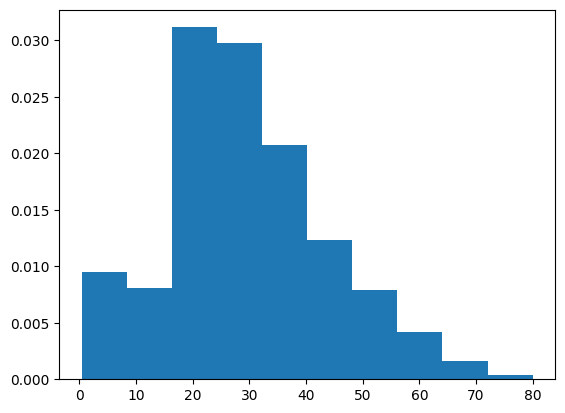

In [14]:
plt.hist(titanic["age"], density=True)

In [46]:
female_mean = titanic.groupby("sex")["age"].mean()["female"]
print(female_mean)

27.915708812260537


In [45]:
female_std = titanic.groupby("sex")["age"].std()["female"]
print(female_std)

14.110146457544133


In [59]:
all_women = titanic[titanic["sex"] == "female"]
all_women.describe()

,survived,pclass,age,sibsp,parch,fare
count,314.000000,314.000000,261.000000,314.000000,314.000000,314.000000
mean,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
std,0.438211,0.857290,14.110146,1.156520,1.022846,57.997698
min,0.000000,1.000000,0.750000,0.000000,0.000000,6.750000
25%,0.000000,1.000000,18.000000,0.000000,0.000000,12.071875
50%,1.000000,2.000000,27.000000,0.000000,0.000000,23.000000
75%,1.000000,3.000000,37.000000,1.000000,1.000000,55.000000
max,1.000000,3.000000,63.000000,8.000000,6.000000,512.329200


(array([23., 11., 41., 47., 44., 35., 24., 19.,  9.,  8.]),
 array([ 0.75 ,  6.975, 13.2  , 19.425, 25.65 , 31.875, 38.1  , 44.325,
        50.55 , 56.775, 63.   ]),
 <BarContainer object of 10 artists>)

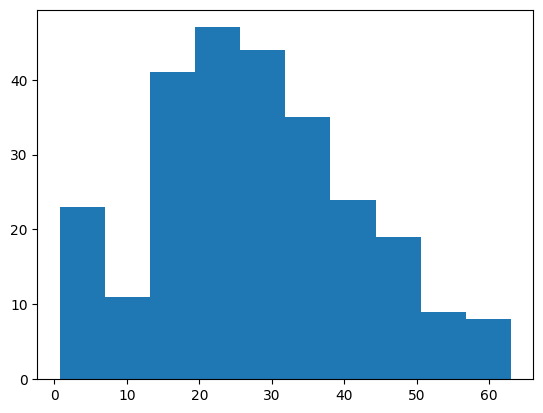

In [60]:
plt.hist(all_women["age"])

In [69]:
women_in_stdev = titanic[(titanic["sex"] == "female") & (abs((titanic["age"] - female_mean)/female_std) <= 2)]
women_in_stdev.describe()

,survived,pclass,age,sibsp,parch,fare
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,0.750988,2.086957,26.905138,0.652174,0.727273,46.795538
std,0.433298,0.840651,13.107098,0.937303,1.076778,61.442232
min,0.000000,1.000000,0.750000,0.000000,0.000000,6.750000
25%,1.000000,1.000000,18.000000,0.000000,0.000000,13.000000
50%,1.000000,2.000000,26.000000,0.000000,0.000000,25.929200
75%,1.000000,3.000000,36.000000,1.000000,1.000000,55.900000
max,1.000000,3.000000,56.000000,5.000000,6.000000,512.329200


(array([23.,  9., 23., 41., 44., 36., 31., 18., 19.,  9.]),
 array([ 0.75 ,  6.275, 11.8  , 17.325, 22.85 , 28.375, 33.9  , 39.425,
        44.95 , 50.475, 56.   ]),
 <BarContainer object of 10 artists>)

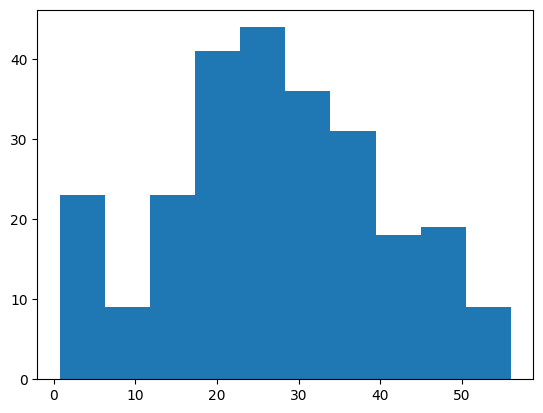

In [70]:
plt.hist(women_in_stdev["age"])

In [71]:
women_in_stdev["age"].count()/all_women["age"].count()

0.9693486590038314

In [73]:
women_in_stdev[women_in_stdev["survived"] == 1].count()

survived       190
pclass         190
sex            190
age            190
sibsp          190
parch          190
fare           190
embarked       189
class          190
who            190
adult_male     190
deck            78
embark_town    189
alive          190
alone          190
dtype: int64

In [80]:
all_men = titanic[titanic["sex"] == "male"]
all_men.head()
print(all_men[all_men["survived"] == 1].count())

survived       109
pclass         109
sex            109
age             93
sibsp          109
parch          109
fare           109
embarked       109
class          109
who            109
adult_male     109
deck            45
embark_town    109
alive          109
alone          109
dtype: int64


(253, 16)

0.9693486590038314

4449331552

4449331552

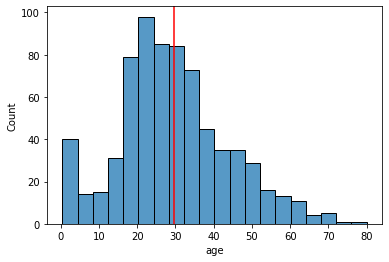

In [26]:
titanic[titanic['sex'] == 'female'].mean(numeric_only = True)

survived       0.742038
pclass         2.159236
age           27.915709
sibsp          0.694268
parch          0.649682
fare          44.479818
adult_male     0.000000
alone          0.401274
dtype: float64

### Probability Mass Functions

$$f(\text{some outcome}) = \text{probability of that outcome}$$

We will care about matching the right probability distribution with a given scenario.  Today we introduce some primary distributions with discrete value inputs.

### Example I: Bernoulli Trial

One event with a binary outcome and a probability of success (and failure).

| outcome | probability |
| --------  | --------  |
|  Heads  | 0.3. |
| Tails |  0.7  |

In [54]:
import scipy.stats as stats

In [55]:
#distribution to model
bernoulli_model = stats.bernoulli(p = 0.3)

In [56]:
#probability of failure
bernoulli_model.pmf(0)

0.7

In [57]:
#probability of success 
bernoulli_model.pmf(1)

0.3

In [58]:
#variance of the trial
bernoulli_model.var()

0.21

In [59]:
#standard deviation of the trial
bernoulli_model.std()

0.458257569495584

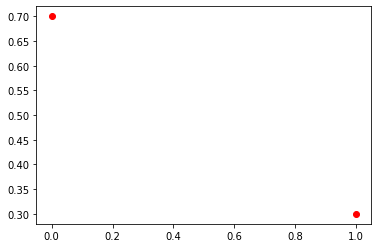

In [61]:
#plot
x = [0, 1]
plt.plot(x, bernoulli_model.pmf(x), 'ro')

### An Old Game: Sennet

We have some number of popsicle sticks colored blue or red on different sides.  We drop them and explore the possible outcomes.  Imagining each outcome is equally likely, please determine the following:

- Drop 1 stick, $P(R)$
- Drop 1 stick, $P(B)$
- Drop 2 sticks, what are all possible outcomes? $P(\text{one red one blue})$?
- Drop 3 sticks, what are all the possible outcomes? $P(\text{BBB})$?

In [ ]:
#define combinations
#from 3 sticks, how many ways are there
#to land all blue


In [ ]:
#examine outcomes for 4 coins


In [ ]:
#determine probabilities for each


In [ ]:
#make a bar plot of probabilities


### Binomial Distribution

Used to model repeated Bernoulli trials.  For example, toss a coin four times.  Its probability mass function is given by:

$$\displaystyle f(k,n,p)=\Pr(k;n,p)=\Pr(X=k)={\binom {n}{k}}p^{k}(1-p)^{n-k}$$



In [68]:
#define binomial
binomial_model = stats.binom(n = 4, p = .5)

In [63]:
#probability of 2 heads
binomial_model.pmf(2)

0.3750000000000001

In [64]:
#probability of 3 heads
binomial_model.pmf(3)

0.125

In [69]:
#define range of all possible outcomes
outcomes = [0, 1, 2, 3, 4]

<BarContainer object of 5 artists>

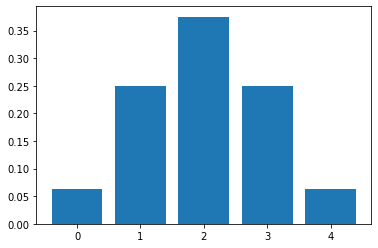

In [70]:
#plot pmf
plt.bar(outcomes, binomial_model.pmf(outcomes))

In [72]:
#probability of no more than 2 heads
###p(0)

###p(1)

###p(2)
binomial_model.pmf(0) + binomial_model.pmf(1) + binomial_model.pmf(2)

0.6875

### Cumulative Distribution Function

Evaluates the cumulative probability up to a given value.  Formally it would be the sum or integral of probabilities until some value $x_i$. 

In [ ]:
###Cumulative distribution function


In [ ]:
###plot side by side pmf and cdf


**PROBLEMS**

[source](https://openstax.org/books/introductory-statistics/pages/4-3-binomial-distribution)

Here are some good old fashioned math problems.  Use our `scipy` distributions to solve each below.  For extra bonus, add a plot and highlight the area or areas of interest.

1. A trainer is teaching a student to do tricks. The probability that the student successfully performs the trick is 35%, and the probability that the student does not successfully perform the trick is 65%. Out of 20 attempts, you want to find the probability that the student succeeds 12 times.

2. A fair, six-sided die is rolled ten times. Each roll is independent. You want to find the probability of rolling a one more than three times.

3. Approximately 70% of statistics students do their homework in time for it to be collected and graded. Each student does homework independently. In a statistics class of 50 students, what is the probability that at least 40 will do their homework on time?

4. In the 2013 Jerry’s Artarama art supplies catalog, there are 560 pages. Eight of the pages feature signature artists. Suppose we randomly sample 100 pages. Let X = the number of pages that feature signature artists.
- What values does x take on?
- What is the probability distribution? Find the following probabilities:
  - the probability that two pages feature signature artists
  - the probability that at most six pages feature signature artists
  - the probability that more than three pages feature signature artists.
- Using the formulas, calculate the (i) mean and (ii) standard deviation.

In [83]:
binom_1 = stats.binom(n=20, p=0.35)
print(binom_1.pmf(12))

0.013564085376714441


In [85]:
binom_2 = stats.binom(n=10, p= (1/6))
print(1 - (binom_2.cdf(3)))

0.0697278425544886


In [87]:
binom_4 = stats.binom(n=100, p = (1/70))
print(binom_4.pmf(2))
print(binom_4.cdf(6))
print(1 - binom_4.cdf(3))

0.24661079870497576
0.9993895625212856
0.05568100546481991


<BarContainer object of 11 artists>

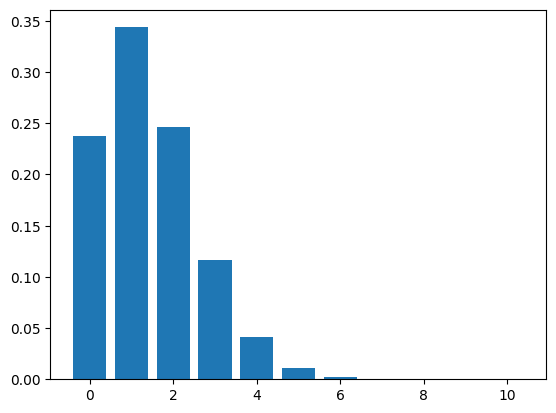

In [90]:
outcomes = [i for i in range(11)]
plt.bar(outcomes, binom_4.pmf(outcomes))

In [91]:
100/70

1.4285714285714286

### Problems with Data

Return to the titanic data.  

1. How many men were on the titanic?
2. Plot a binomial distribution with $n = \text{number of men on titanic}$, and probability of $\frac{1}{2}$.  
3. How many men died on the titanic?
4. Locate this outcome on your probability distribution.  Is it unlikely?  Why?

In [96]:
titanic_men = titanic[titanic["sex"] == "male"]
num_men_titanic = titanic_men["age"].count()
print(num_men_titanic)

453


<BarContainer object of 454 artists>

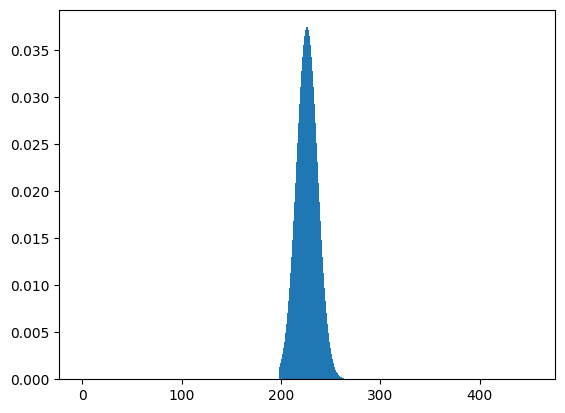

In [97]:
binomial_titanic = stats.binom(n = num_men_titanic, p=0.5)
outcomes = np.arange(num_men_titanic+1)
plt.bar(outcomes, binomial_titanic.pmf(outcomes))

In [98]:
survivors = titanic_men[titanic_men["survived"] == 1]["age"].count()
print(survivors)

93


### Multivalued distributions and Correlation

**Multinomial**: Rolling a die!

Rolling two die.

### Manufacture some data

### Correlation between values

$${\displaystyle r_{xy}\quad {\overset {\underset {\mathrm {def} }{}}{=}}\quad {\frac {\sum \limits _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{(n-1)s_{x}s_{y}}}={\frac {\sum \limits _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{\sqrt {\sum \limits _{i=1}^{n}(x_{i}-{\bar {x}})^{2}\sum \limits _{i=1}^{n}(y_{i}-{\bar {y}})^{2}}}},}$$

![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/83/Pearson_Correlation_Coefficient_and_associated_scatterplots.png/440px-Pearson_Correlation_Coefficient_and_associated_scatterplots.png)

### Problems

1. Load in the penguins dataset from seaborn.
2. Draw a scatter matrix of the data.
3. Do any features seem to be related linearly?
4. What is the correlation between these features?

### BONUS: Geometric Distribution

The geometric distribution gives the probability that the first occurrence of success requires k independent trials, each with success probability p. If the probability of success on each trial is p, then the probability that the kth trial (out of k trials) is the first success is

$$\Pr(X=k)=(1-p)^{k-1}p$$

for k = 1, 2, 3, ....

--[Wikipedia](https://en.wikipedia.org/wiki/Geometric_distribution)

1. You play a game of chance that you can either win or lose (there are no other possibilities) until you lose. Your probability of losing is p = 0.57. What is the probability that it takes five games until you lose?
2. The lifetime risk of developing pancreatic cancer is about one in 78 (1.28%). Let $X$ = the number of people you ask until one says he or she has pancreatic cancer. Then $X$ is a discrete random variable with a geometric distribution: $X \sim G(78)$ or $X \sim G(0.0128)$.
  - What is the probability of that you ask ten people before one says he or she has pancreatic cancer?
  - What is the probability that you must ask 20 people?


### Hypergeometric Distribution

**(Think: Geometric with no replacement)**

Suppose we have a collection of 20 animals, of which 7 are dogs. Then if we want to know the probability of finding a given number of dogs if we choose at random 12 of the 20 animals.

In [ ]:
#define distribution
stats.hypergeom

In [ ]:
#plot the distribution


In [ ]:
#probability you choose 4 dogs?


### Poisson Distribution

"Poisson distribution ... named after French mathematician Siméon Denis Poisson, is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant mean rate and independently of the time since the last event" -- [Wikipedia](https://en.wikipedia.org/wiki/Poisson_distribution)

1. The average number of loaves of bread put on a shelf in a bakery in a half-hour period is 12. Of interest is the number of loaves of bread put on the shelf in five minutes. The time interval of interest is five minutes. What is the probability that the number of loaves, selected randomly, put on the shelf in five minutes is three?

2. The average number of fish caught in an hour is eight. Of interest is the number of fish caught in 15 minutes. The time interval of interest is 15 minutes. What is the average number of fish caught in 15 minutes?

3. An electronics store expects to have ten returns per day on average. The manager wants to know the probability of the store getting fewer than eight returns on any given day.

4. Leah's answering machine receives about six telephone calls between 8 a.m. and 10 a.m. What is the probability that Leah receives more than one call in the next 15 minutes?